[[-0.03349194  0.00139278  0.05410295 ...  0.00312004  0.02330735
   0.00668638]
 [-0.02990923 -0.01187981 -0.04002628 ... -0.05068816 -0.01033549
   0.04630694]
 [ 0.00456633 -0.01108854 -0.05324823 ... -0.058917   -0.01101023
  -0.0474553 ]
 ...
 [-0.00570993 -0.04559399  0.02856131 ... -0.03115013  0.03017131
   0.02277251]
 [-0.01178592  0.00324617  0.04704354 ... -0.005521   -0.00411282
   0.05781168]
 [ 0.00947513 -0.00531247 -0.04893043 ... -0.01455558 -0.03141285
  -0.02509005]]


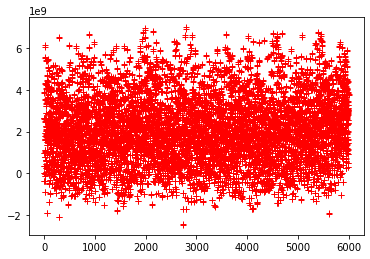

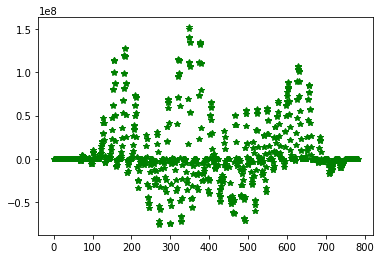

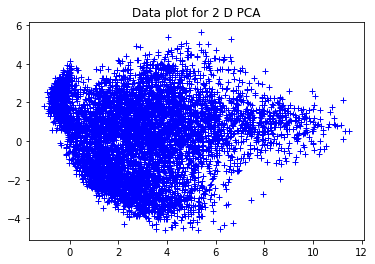

In [2]:
from __future__ import print_function

import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt


def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)

    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [int(x) for x in num[1:]]

    return data, labels


# gradient Descent

train_data, train_labels = read_data("sample_train.csv")
train_data = train_data / 255
cov_mat = np.cov(train_data.T)
alpha = 0.5
H = np.random.randn(784, 784)
Q, R = qr(H)
p = Q
print(p)
gradient = np.zeros((1, 784))
for i in range(100):
    for j in range(2):
        for k in range(3, 784):
            gradient += 6000*np.matmul(cov_mat, p[:, k])
        p[:, j] = p[:, j] - alpha * 2 * gradient
z = np.matmul(train_data, p[:, 0:2])
plt.plot(z, 'r+')
plt.show()
evalue, evct = np.linalg.eig(cov_mat)
s = (p[:, 0:2] - evct[:, 0:2])
plt.plot(s,'g*')
plt.show()
q = train_data.dot(evct[:, 0:2])
plt.plot(q[:, 0], q[:, 1], 'b+')
plt.title('Data plot for 2 D PCA')
plt.show()